<a href="https://colab.research.google.com/github/Sharath2424/Data-Science-projects/blob/main/Employee_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem statement:

### Employee attrition.

# **Import libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/colab datasets/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [ ]:
df.shape

(1470, 35)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Dataset contains 0 null values.

In this dataset our target variable is Attrition, so let's check if the data is balanced or not.

In [ ]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

We can observe that the dataset i imbalanced. 237 out of 1470 employees left the company.

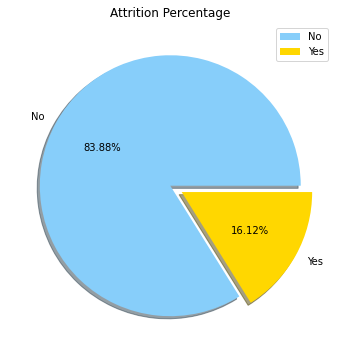

In [ ]:
labels = df['Attrition'].value_counts().index
size = df['Attrition'].value_counts().values
plt.figure(figsize = (6,6))
plt.pie(size,colors = ['lightskyblue', 'gold'],explode = (0, 0.1), labels = labels,shadow = True,autopct = "%.2f%%")
plt.title('Attrition Percentage')
plt.axis('off')
plt.legend()
plt.show()

Positive class accounts for about 16.12% of data.So we can say that our dataset is imbalanced.

In [ ]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

# **EDA**

In [ ]:
# Numerical features
num_features = ['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate',
                'PercentSalaryHike','TotalWorkingYears',
                'YearsAtCompany','YearsInCurrentRole',
                'YearsSinceLastPromotion','YearsWithCurrManager']

In [ ]:
# Categorical features
cat_features = ['BusinessTravel','Department','Education','EducationField','EnvironmentSatisfaction',
                'Gender','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus',
                'NumCompaniesWorked','TrainingTimesLastYear','OverTime','PerformanceRating','RelationshipSatisfaction',
                'StockOptionLevel','WorkLifeBalance']

In [ ]:
print("Number of numerical features in our dataset = ",len(num_features))

Number of numerical features in our dataset =  12


In [ ]:
print("Number of categorical features in our dataset = ",len(cat_features))

Number of categorical features in our dataset =  18


# Analyzing Numerical Features

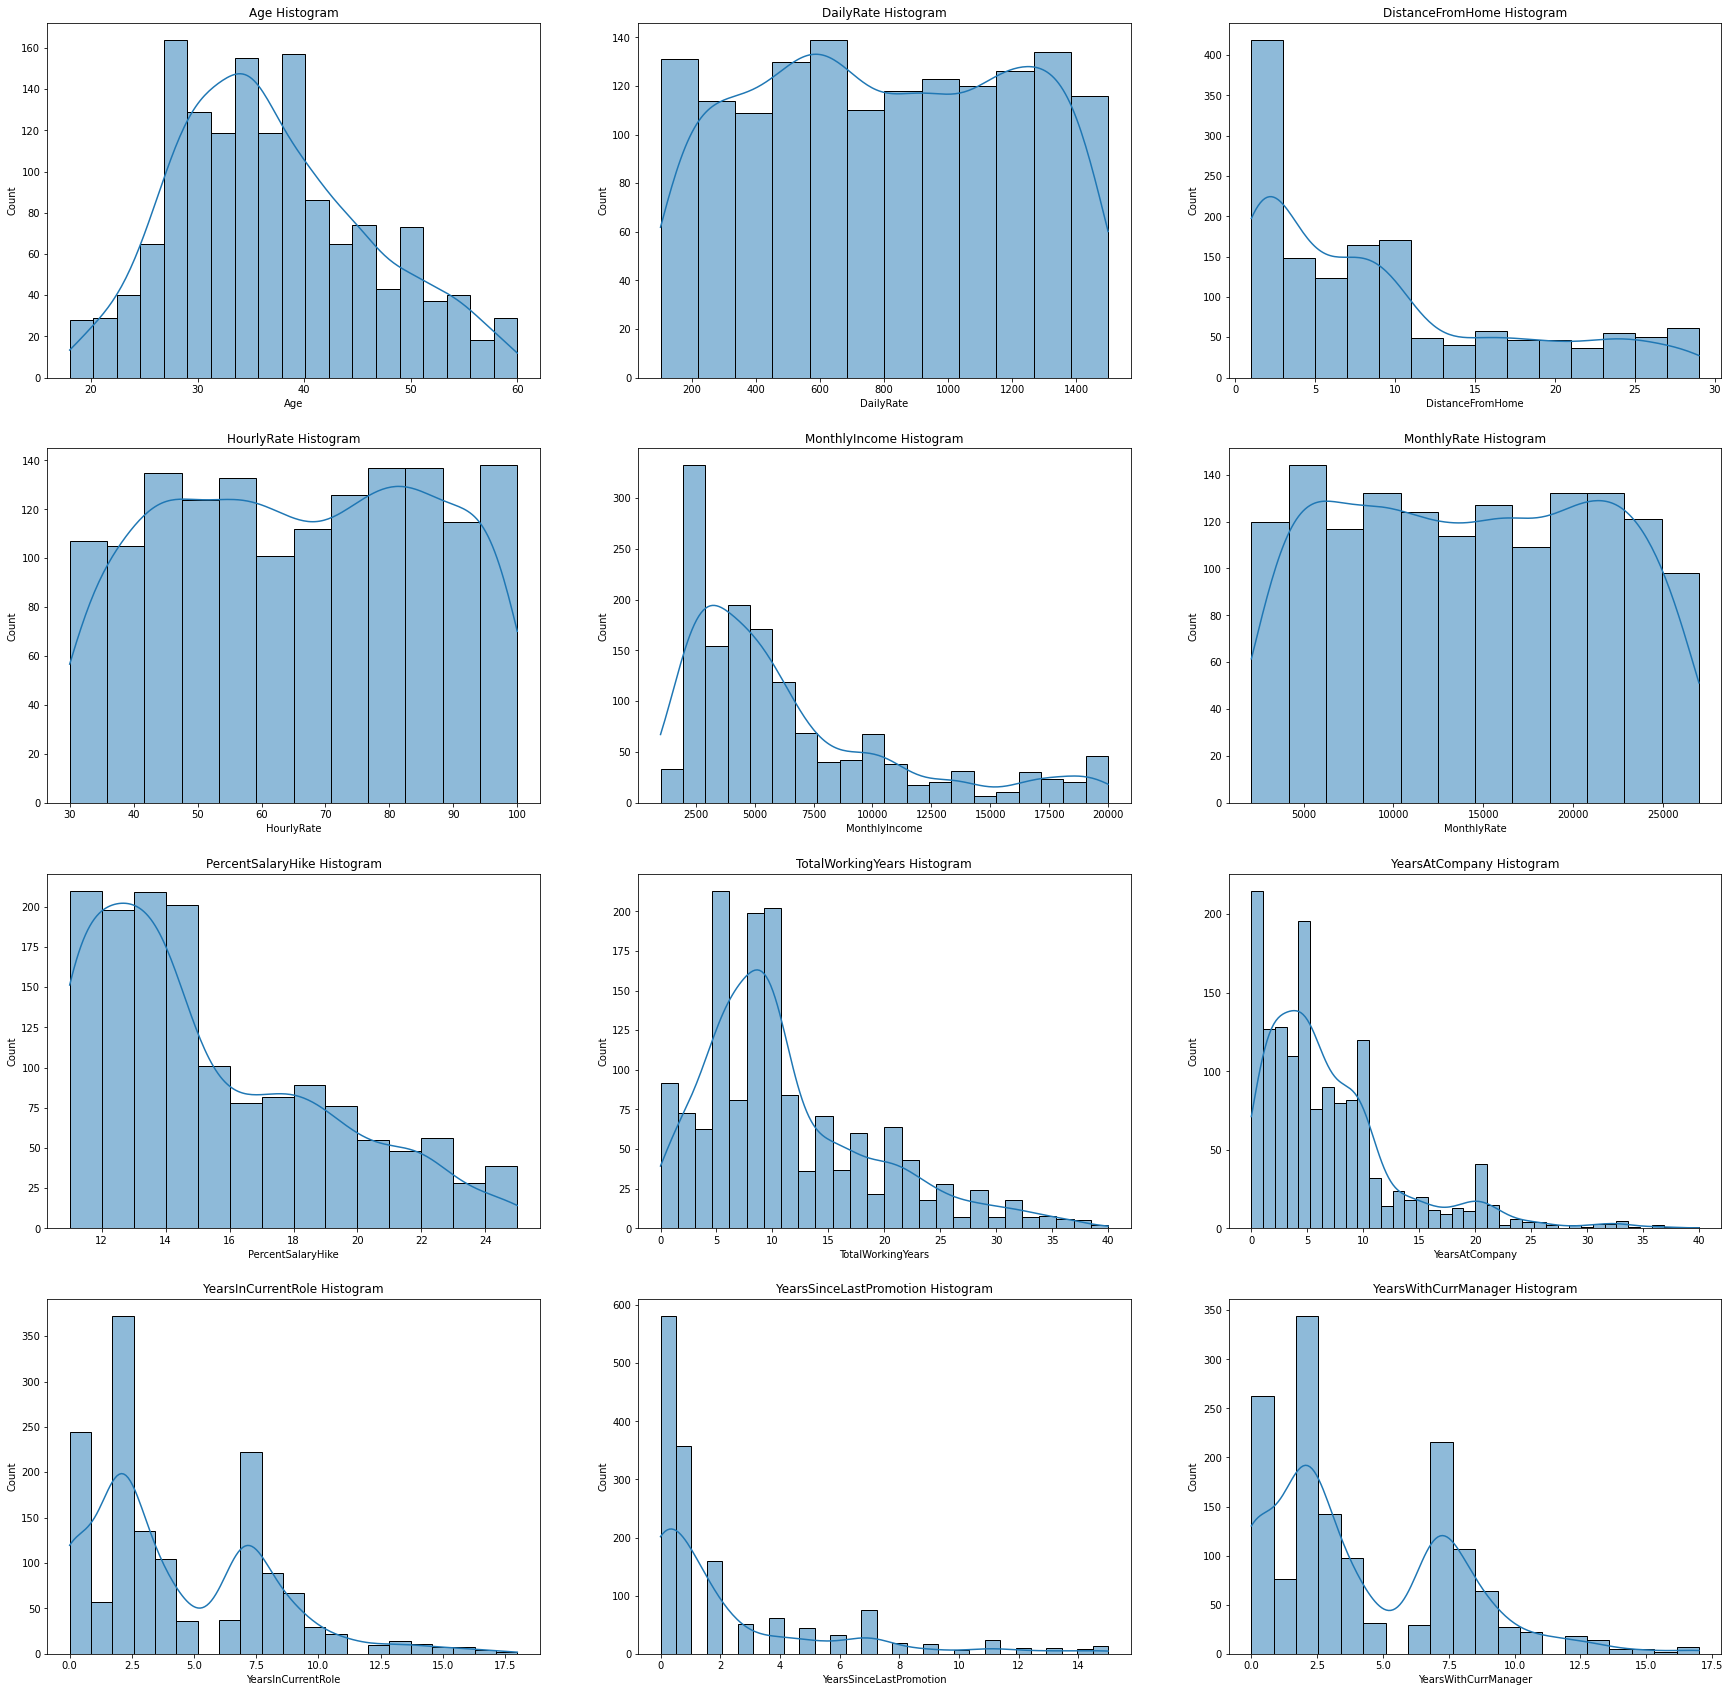

In [ ]:
plt.figure(figsize = (30,30))
for i,feature in enumerate(num_features):
    ax = plt.subplot(4,3,i+1)
    sns.histplot(df[feature],kde = True)
    ax.set_title(feature + " Histogram")

# Outliers in the dataset

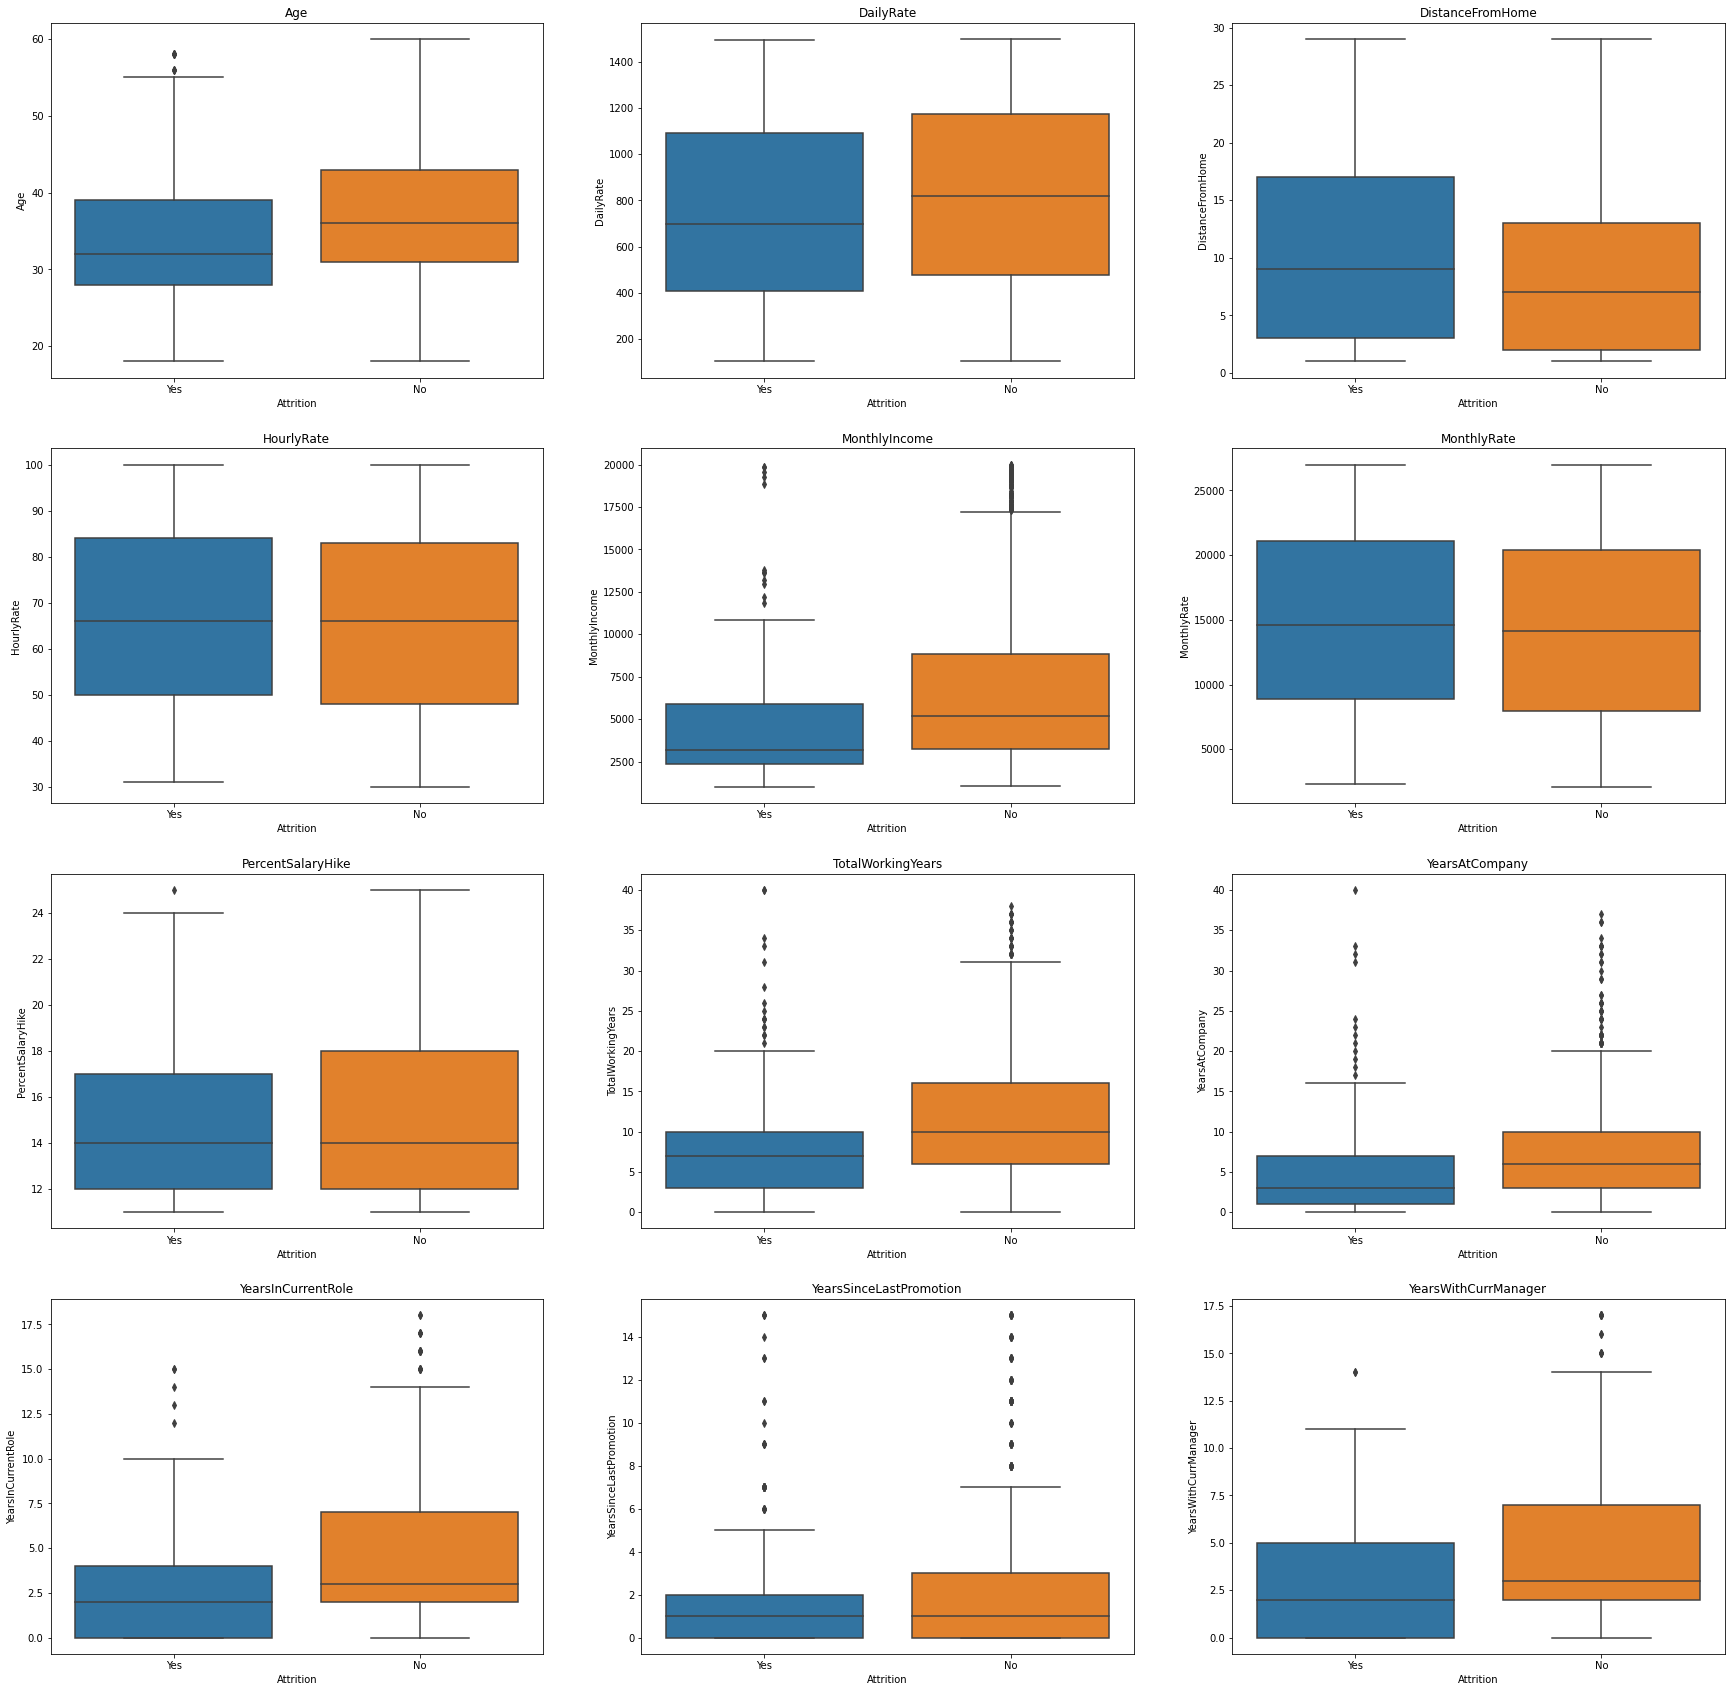

In [ ]:
plt.figure(figsize = (30,30))
for i,feature in enumerate(num_features):
    ax = plt.subplot(4,3,i+1)
    sns.boxplot(y = df[feature], x = df['Attrition'])
    ax.set_title(feature)

# Analyzing Categoricals Features

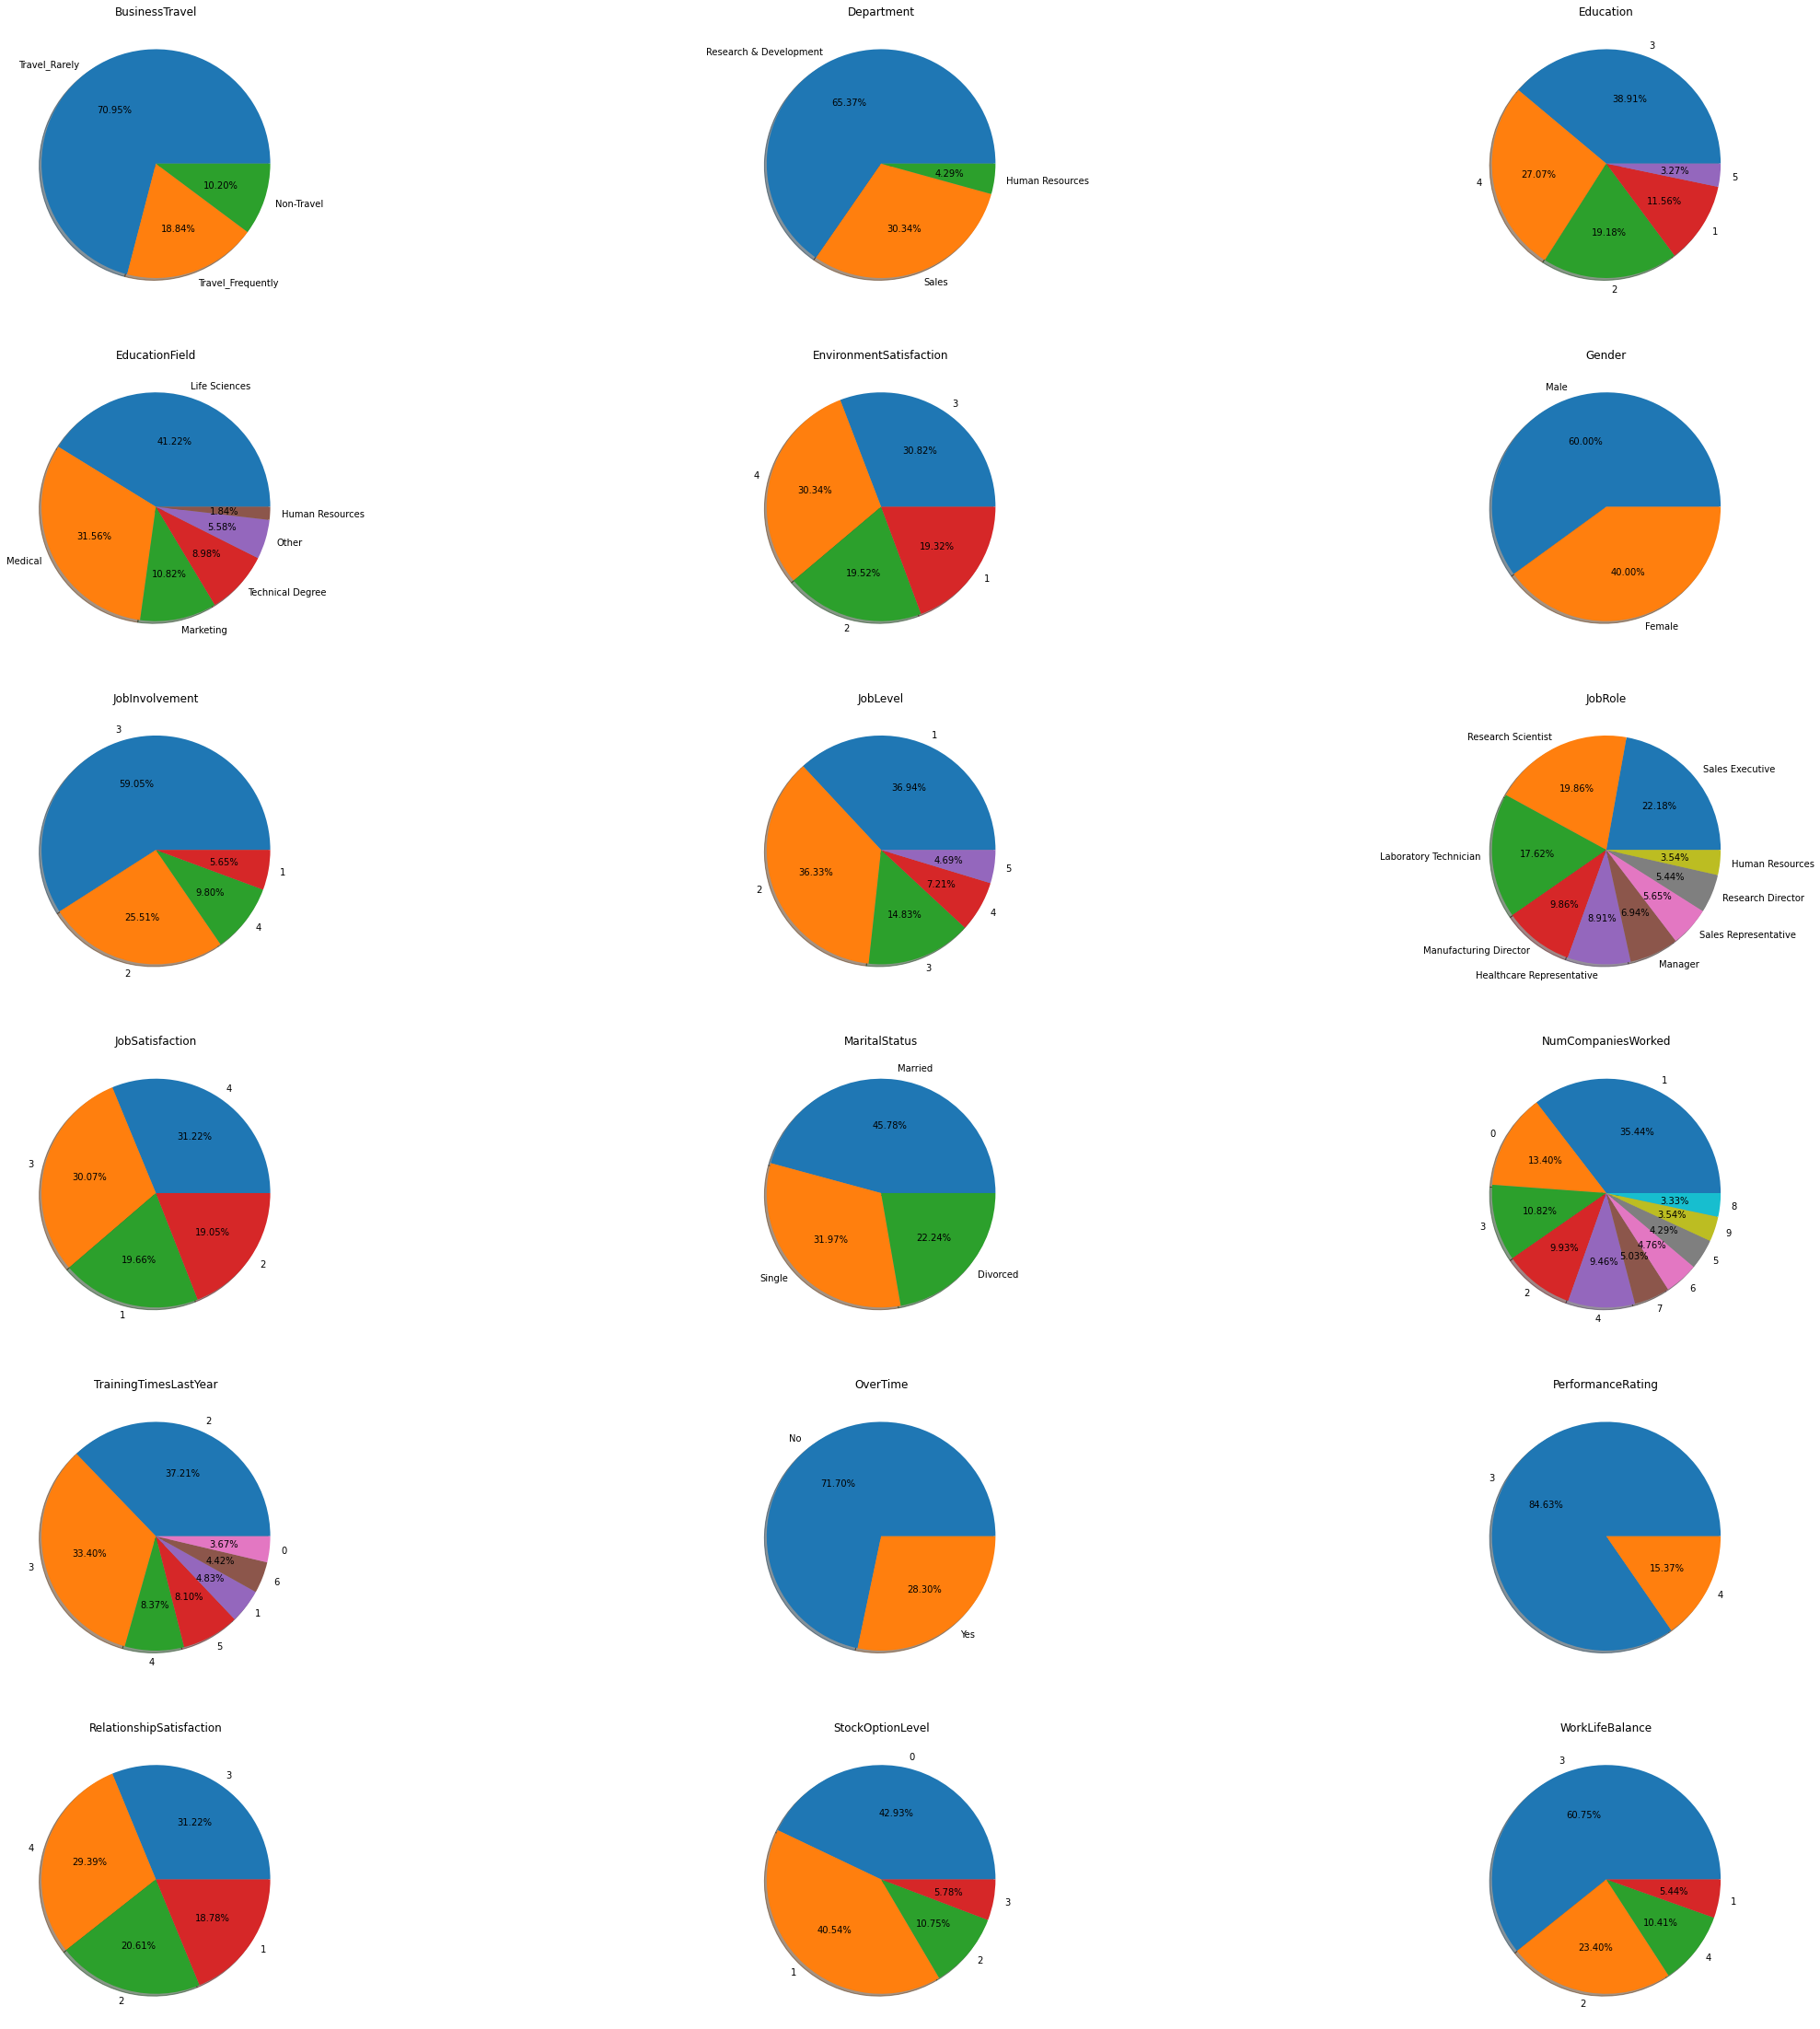

In [ ]:
plt.figure(figsize = (40,40))
for i,feature in enumerate(cat_features):
    labels = df[feature].value_counts().index
    size = df[feature].value_counts().values
    ax = plt.subplot(6,3,i+1)
    ax.pie(size,labels = labels,shadow = True,autopct = "%.2f%%")
    plt.title(feature)
    ax.axis('off')

# Numerical features v/s Attrition

Age feature

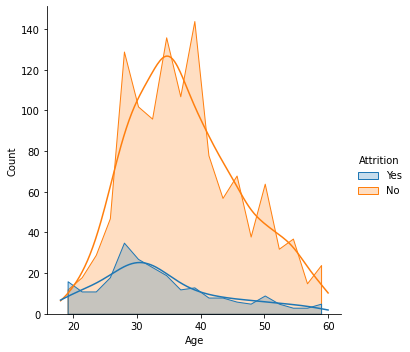

In [ ]:
sns.displot(x = "Age", hue = "Attrition",element = "poly", data = df,kde = True)
plt.show()

DistanceFromHome feature

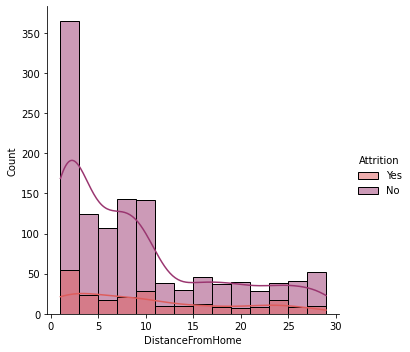

In [ ]:
sns.displot(x = "DistanceFromHome", hue = "Attrition", data = df,kde = True,palette = 'flare')
plt.show()

MonthlyIncome feature

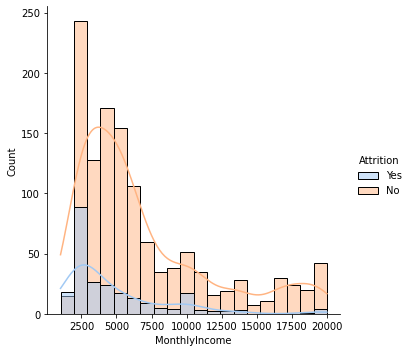

In [ ]:
sns.displot(x = "MonthlyIncome", hue = "Attrition", data = df,kde = True,palette = 'pastel')
plt.show()

PercentSalaryHike feature

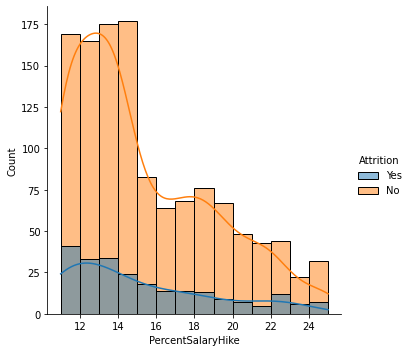

In [ ]:
sns.displot(x = "PercentSalaryHike", hue = "Attrition", data = df,kde = True)
plt.show()

YearsAtCompany feature

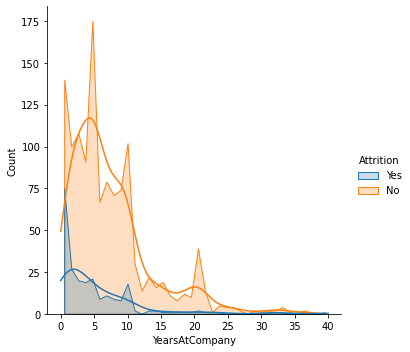

In [ ]:
sns.displot(x = "YearsAtCompany",element = "poly", hue = "Attrition", data = df,kde = True)
plt.show()

YearsSinceLastPromotion feature

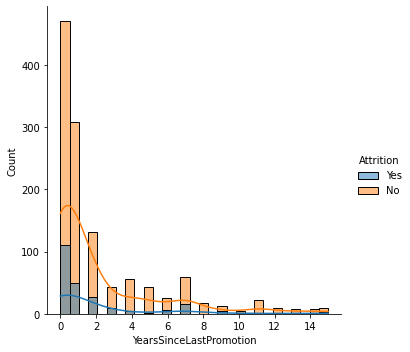

In [ ]:
sns.displot(x = "YearsSinceLastPromotion",hue = "Attrition", data = df,kde = True)
plt.show()

# Categorical features v/s Attrition

BusinessTravel feature

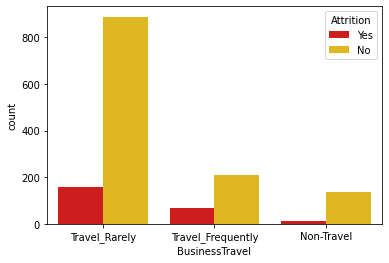

In [ ]:
sns.countplot(x = "BusinessTravel",hue = "Attrition",data = df, palette= 'hot')
sns.set_style("whitegrid")
plt.show()

(-1.25, 1.25, -1.25, 1.25)

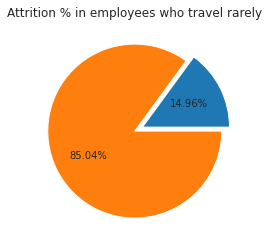

In [ ]:
size = [df['BusinessTravel'][(df['Attrition'] == 'Yes') & (df['BusinessTravel'] == 'Travel_Rarely')].count(),df['BusinessTravel'][(df['Attrition'] == 'No') & (df['BusinessTravel'] == 'Travel_Rarely')].count()]
plt.pie(size,explode = (0.1,0),autopct='%.2f%%' )
plt.title('Attrition % in employees who travel rarely')
plt.axis('off')

(-1.25, 1.25, -1.25, 1.25)

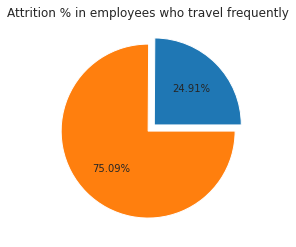

In [ ]:
size = [df['BusinessTravel'][(df['Attrition'] == 'Yes') & (df['BusinessTravel'] == 'Travel_Frequently')].count(),df['BusinessTravel'][(df['Attrition'] == 'No') & (df['BusinessTravel'] == 'Travel_Frequently')].count()]
plt.pie(size,explode = (0.1,0),autopct='%.2f%%' )
plt.title('Attrition % in employees who travel frequently')
plt.axis('off')

Department feature

In [ ]:
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

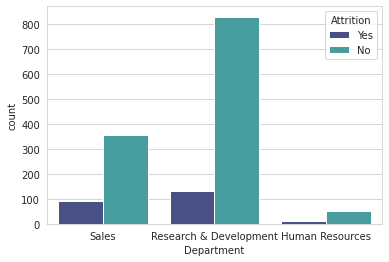

In [ ]:
sns.countplot(x = "Department",hue = "Attrition",data = df, palette= 'mako')
plt.show()

(-1.25, 1.25, -1.25, 1.25)

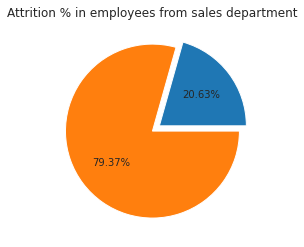

In [ ]:
size = [df['Department'][(df['Attrition'] == 'Yes') & (df['Department'] == 'Sales')].count(),df['Department'][(df['Attrition'] == 'No') & (df['Department'] == 'Sales')].count()]
plt.pie(size,explode = (0.1,0),autopct='%.2f%%' )
plt.title('Attrition % in employees from sales department')
plt.axis('off')

(-1.25, 1.25, -1.25, 1.25)

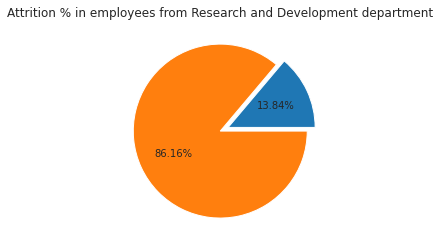

In [ ]:
size = [df['Department'][(df['Attrition'] == 'Yes') & (df['Department'] == 'Research & Development')].count(),df['Department'][(df['Attrition'] == 'No') & (df['Department'] == 'Research & Development')].count()]
plt.pie(size,explode = (0.1,0),autopct='%.2f%%' )
plt.title('Attrition % in employees from Research and Development department')
plt.axis('off')

EducationField feature

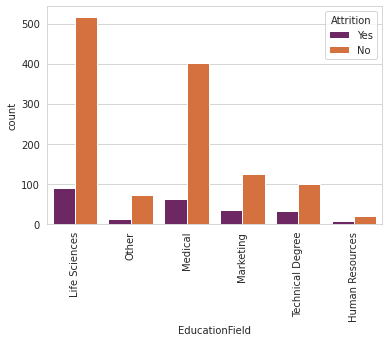

In [ ]:
sns.countplot(x = "EducationField",hue = "Attrition",data = df, palette= 'inferno')
plt.xticks(rotation = 90)
plt.show()

(-1.25, 1.25, -1.25, 1.25)

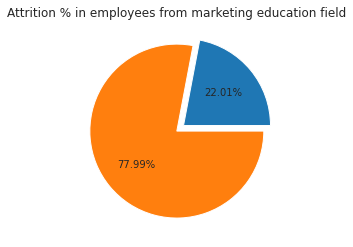

In [ ]:
size = [df['EducationField'][(df['Attrition'] == 'Yes') & (df['EducationField'] == 'Marketing')].count(),df['EducationField'][(df['Attrition'] == 'No') & (df['EducationField'] == 'Marketing')].count()]
plt.pie(size,explode = (0.1,0),autopct='%.2f%%' )
plt.title('Attrition % in employees from marketing education field')
plt.axis('off')

(-1.25, 1.25, -1.25, 1.25)

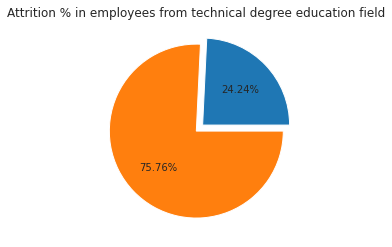

In [ ]:
size = [df['EducationField'][(df['Attrition'] == 'Yes') & (df['EducationField'] == 'Technical Degree')].count(),df['EducationField'][(df['Attrition'] == 'No') & (df['EducationField'] == 'Technical Degree')].count()]
plt.pie(size,explode = (0.1,0),autopct='%.2f%%' )
plt.title('Attrition % in employees from technical degree education field')
plt.axis('off')

(-1.25, 1.25, -1.25, 1.25)

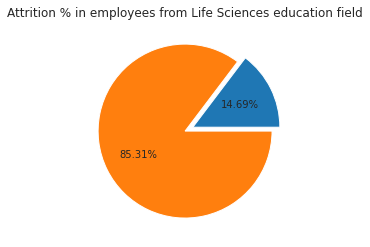

In [ ]:
size = [df['EducationField'][(df['Attrition'] == 'Yes') & (df['EducationField'] == 'Life Sciences')].count(),df['EducationField'][(df['Attrition'] == 'No') & (df['EducationField'] == 'Life Sciences')].count()]
plt.pie(size,explode = (0.1,0),autopct='%.2f%%' )
plt.title('Attrition % in employees from Life Sciences education field')
plt.axis('off')

(-1.25, 1.25, -1.25, 1.25)

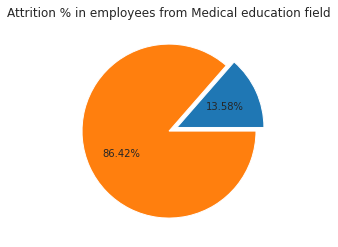

In [ ]:
size = [df['EducationField'][(df['Attrition'] == 'Yes') & (df['EducationField'] == 'Medical')].count(),df['EducationField'][(df['Attrition'] == 'No') & (df['EducationField'] == 'Medical')].count()]
plt.pie(size,explode = (0.1,0),autopct='%.2f%%' )
plt.title('Attrition % in employees from Medical education field')
plt.axis('off')

Gender feature

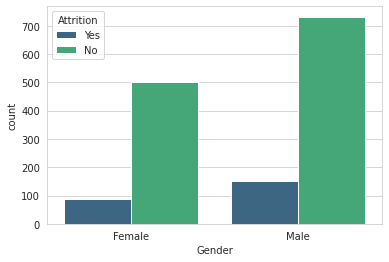

In [ ]:
sns.countplot(x = "Gender",hue = "Attrition",data = df, palette= 'viridis')
plt.show()

(-1.25, 1.25, -1.25, 1.25)

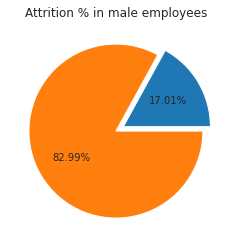

In [ ]:
size = [df['Gender'][(df['Attrition'] == 'Yes') & (df['Gender'] == 'Male')].count(),df['Gender'][(df['Attrition'] == 'No') & (df['Gender'] == 'Male')].count()]
plt.pie(size,explode = (0.1,0),autopct='%.2f%%' )
plt.title('Attrition % in male employees')
plt.axis('off')

(-1.25, 1.25, -1.25, 1.25)

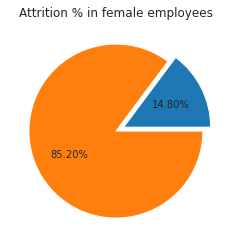

In [ ]:
size = [df['Gender'][(df['Attrition'] == 'Yes') & (df['Gender'] == 'Female')].count(),df['Gender'][(df['Attrition'] == 'No') & (df['Gender'] == 'Female')].count()]
plt.pie(size,explode = (0.1,0),autopct='%.2f%%' )
plt.title('Attrition % in female employees')
plt.axis('off')

OverTime feature

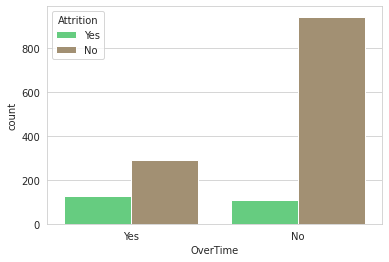

In [ ]:
sns.countplot(x = "OverTime",hue = "Attrition",data = df, palette= 'terrain')
plt.show()

(-1.25, 1.25, -1.25, 1.25)

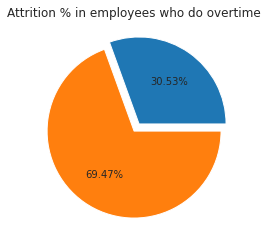

In [ ]:
size = [df['OverTime'][(df['Attrition'] == 'Yes') & (df['OverTime'] == 'Yes')].count(),df['OverTime'][(df['Attrition'] == 'No') & (df['OverTime'] == 'Yes')].count()]
plt.pie(size,explode = (0.1,0),autopct='%.2f%%' )
plt.title('Attrition % in employees who do overtime')
plt.axis('off')

(-1.25, 1.25, -1.25, 1.25)

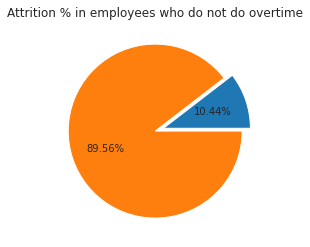

In [ ]:
size = [df['OverTime'][(df['Attrition'] == 'Yes') & (df['OverTime'] == 'No')].count(),df['OverTime'][(df['Attrition'] == 'No') & (df['OverTime'] == 'No')].count()]
plt.pie(size,explode = (0.1,0),autopct='%.2f%%' )
plt.title('Attrition % in employees who do not do overtime')
plt.axis('off')

EnvironmentSatisfaction feature

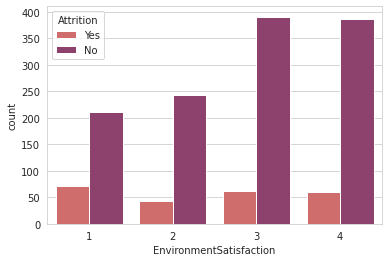

In [ ]:
sns.countplot(x = "EnvironmentSatisfaction",hue = "Attrition",data = df, palette= 'flare')
plt.show()

(-1.25, 1.25, -1.25, 1.25)

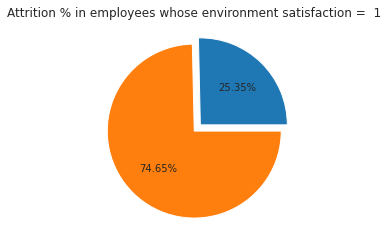

In [ ]:
size = [df['EnvironmentSatisfaction'][(df['Attrition'] == 'Yes') & (df['EnvironmentSatisfaction'] == 1)].count(),df['EnvironmentSatisfaction'][(df['Attrition'] == 'No') & (df['EnvironmentSatisfaction'] == 1)].count()]
plt.pie(size,explode = (0.1,0),autopct='%.2f%%' )
plt.title('Attrition % in employees whose environment satisfaction =  1')
plt.axis('off')

(-1.25, 1.25, -1.25, 1.25)

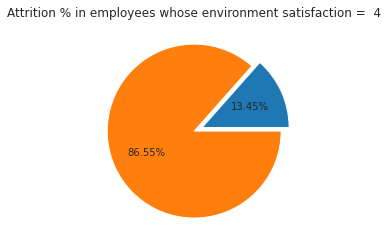

In [ ]:
size = [df['EnvironmentSatisfaction'][(df['Attrition'] == 'Yes') & (df['EnvironmentSatisfaction'] == 4)].count(),df['EnvironmentSatisfaction'][(df['Attrition'] == 'No') & (df['EnvironmentSatisfaction'] == 4)].count()]
plt.pie(size,explode = (0.1,0),autopct='%.2f%%' )
plt.title('Attrition % in employees whose environment satisfaction =  4')
plt.axis('off')

# Inferences
1. Most employees are from Research & Development department (65.37 %)
2. Most employees have medium (Bachelor's) level of education (38.91 %)
3. Most employees have Sales executive as their job role(22.18 %)
4. As expected Attrition is relatively higher in employees with lower monthly income
5. Attrition starts decreasing as employee's years at company reaches to 15 years
6. MonthlyIncome, Age, PercentSalaryHike and YearsAtCompany features are greatly impacting Attrition rate.
7. Attrition percentage is highest in employees who travel frequently(24.91 %)
8. Attrition percentage is highest in employees who are from Sales department(20.63 %)
9. Attrition percentage is highest in employees who are from Technical degree education field(24.24 %)
10. Attrition percentage is highest in male employees (17.01 %)
11. Attrition percentage is highest in employees who do overtime(30.53 %)
12. Attrition percentage is highest in employees who has 1(low) of Environment Satisfaction(25.35 %)





# **FEATURE ENGINEERING**

EmployeeCount,Over18 and StandardHours contains a single unique value.So these features will not be useful for either visualization or modelling. EmployeeNumber feature is just an identifier and it's not required for modelling either.



In [ ]:
df.drop(['EmployeeCount'],axis = 1, inplace = True)
df.drop(['StandardHours'],axis = 1,inplace = True)
df.drop(['Over18'],axis = 1,inplace = True)
df.drop(['EmployeeNumber'],axis = 1,inplace = True)

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


# Correlation between features

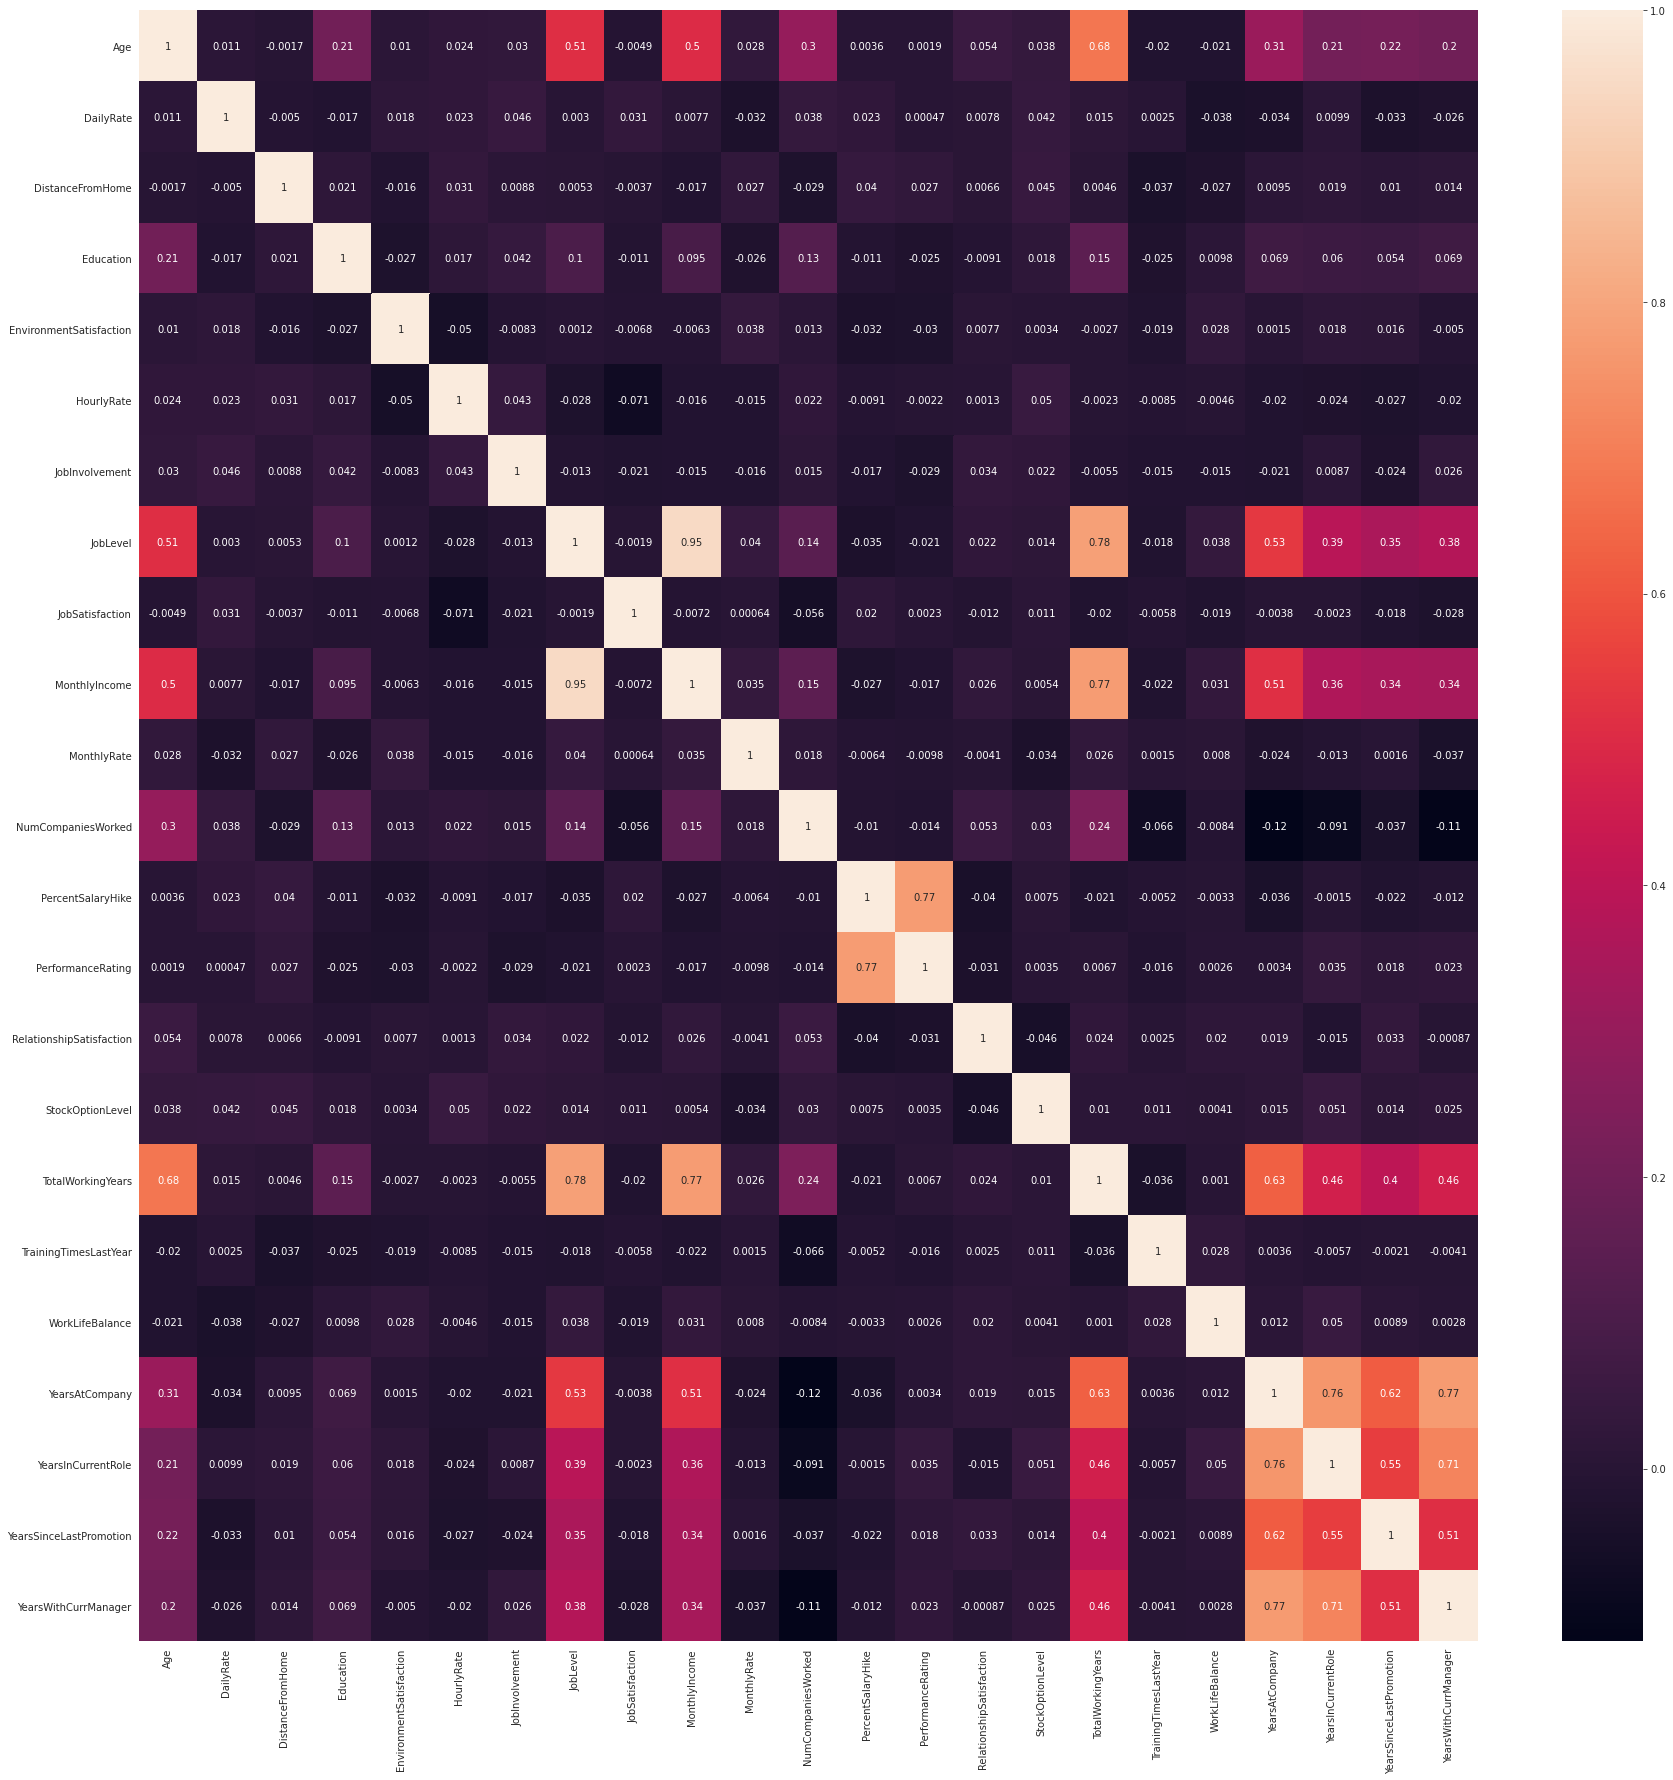

In [ ]:
plt.figure(figsize = (30,30))
sns.heatmap(df.corr(),annot = True, cmap= 'rocket')
plt.show()

Correlation coefficients whose magnitude are between 0.7 and 0.9 indicate variables which can be considered highly correlated. Highly correlated features are -:

1. JobLevel and MonthlyIncome - 0.95
2. JobLevel and TotalWorkingYears - 0.78
3. MonthlyIncome and TotalworkingYears - 0.77
4. PercentSalaryHike and PerformanceRating - 0.77
5. YearsAtCompany and YearsWithCurrManager - 0.77
6. YearsAtCompany and YearsInCurrRole - 0.76
7. YearsInCurrentRole and YearsWithCurrentManager - 0.71

We will drop the features which are highly correalated with each other

In [ ]:
df.drop(['JobLevel'],axis = 1,inplace = True)
df.drop(['TotalWorkingYears'],axis = 1,inplace = True)
df.drop(['PerformanceRating'],axis = 1,inplace = True)
df.drop(['YearsWithCurrManager'],axis = 1,inplace = True)
df.drop(['YearsInCurrentRole'],axis = 1,inplace = True)

In [ ]:
cat_features.remove('JobLevel')
cat_features.remove('PerformanceRating')
cat_features

['BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'NumCompaniesWorked',
 'TrainingTimesLastYear',
 'OverTime',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'WorkLifeBalance']

In [ ]:
num_features.remove('TotalWorkingYears')
num_features.remove('YearsInCurrentRole')
num_features.remove('YearsWithCurrManager')
num_features

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'PercentSalaryHike',
 'YearsAtCompany',
 'YearsSinceLastPromotion']

# Feature Scaling

In [ ]:
le = LabelEncoder()
for feature in cat_features:
    df[feature] = le.fit_transform(df[feature])

In [ ]:
sc = StandardScaler()
for feature in num_features:
    df[feature] = sc.fit_transform(np.array(df[feature]).reshape(-1,1))

In [ ]:
df['Attrition'] = le.fit_transform(df['Attrition'])

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,0.446350,1,2,0.742527,2,-1.010909,1,1,1,0,1.383138,2,7,3,2,-0.108350,0.726020,8,1,-1.150554,0,0,0,0,-0.164613,-0.679146
1,1.322365,0,1,-1.297775,1,-0.147150,0,1,2,1,-0.240677,1,6,1,1,-0.291719,1.488876,1,0,2.129306,3,1,3,2,0.488508,-0.368715
2,0.008343,1,2,1.414363,1,-0.887515,1,4,3,1,1.284725,1,2,2,2,-0.937654,-1.674841,6,1,-0.057267,1,0,3,2,-1.144294,-0.679146
3,-0.429664,0,1,1.461466,1,-0.764121,3,1,3,0,-0.486709,2,6,2,1,-0.763634,1.243211,1,1,-1.150554,2,0,3,2,0.161947,0.252146
4,-1.086676,0,2,-0.524295,1,-0.887515,0,3,0,1,-1.274014,2,2,1,1,-0.644858,0.325900,9,0,-0.877232,3,1,3,2,-0.817734,-0.058285


TRAIN-TEST SPLIT

Stratified K-Fold

In [ ]:
X = df.drop(['Attrition'],axis = 1)
y = df['Attrition']

In [ ]:
skf = StratifiedKFold(n_splits = 5)
skf.get_n_splits(X,y)
print(skf)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


# Model building

## Logistic Regression

In [ ]:
lr_model = LogisticRegression(solver='liblinear')

Accuracy

In [ ]:
i = 0
for train_index, test_index in skf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    lr_model.fit(X_train,y_train)
    y_pred = lr_model.predict(X_test)
    i = i+1

    print('Accuracy of fold', i, '=', accuracy_score(y_test,y_pred))

Accuracy of fold 1 = 0.8639455782312925
Accuracy of fold 2 = 0.8503401360544217
Accuracy of fold 3 = 0.8605442176870748
Accuracy of fold 4 = 0.8775510204081632
Accuracy of fold 5 = 0.8673469387755102


In [ ]:
print('Accuracy of fold', i, '=', accuracy_score(y_test,y_pred))

Accuracy of fold 5 = 0.8673469387755102


Confusion Matrix of a Single Fold

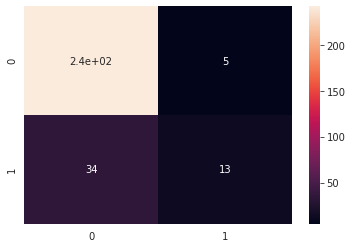

In [ ]:
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix, annot = True)

## Decision Tree Classifier

In [ ]:
dt_model = DecisionTreeClassifier(criterion = "entropy",max_depth = 3)

Accuracy

In [ ]:
i = 0
for train_index, test_index in skf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    dt_model.fit(X_train,y_train)
    y_pred = dt_model.predict(X_test)
    i = i+1
    print('Accuracy of fold',i , '= ',accuracy_score(y_test,y_pred))

Accuracy of fold 1 =  0.8367346938775511
Accuracy of fold 2 =  0.8367346938775511
Accuracy of fold 3 =  0.8537414965986394
Accuracy of fold 4 =  0.8503401360544217
Accuracy of fold 5 =  0.8503401360544217


Confusion Matrix of a Single Fold

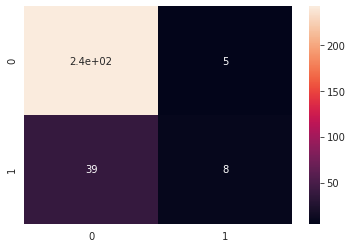

In [ ]:
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix, annot = True)

# Random Forest Classifier

In [ ]:
rf_model= RandomForestClassifier( criterion='gini', max_depth=5)

In [ ]:
i = 0
for train_index, test_index in skf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    rf_model.fit(X_train,y_train)
    y_pred = rf_model.predict(X_test)
    i = i+1
    print('Accuracy of fold',i , '= ',accuracy_score(y_test,y_pred))

Accuracy of fold 1 =  0.8469387755102041
Accuracy of fold 2 =  0.8469387755102041
Accuracy of fold 3 =  0.8605442176870748
Accuracy of fold 4 =  0.8435374149659864
Accuracy of fold 5 =  0.8469387755102041


Confusion Matrix of a Single Fold

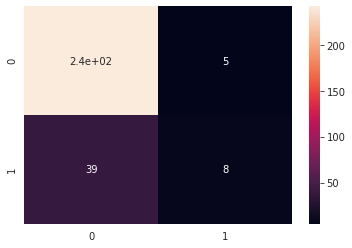

In [ ]:
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix, annot = True)

## KNN Classifier

In [ ]:
knn_model= KNeighborsClassifier(n_neighbors=5)

In [ ]:
i = 0
for train_index, test_index in skf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    knn_model.fit(X_train,y_train)
    y_pred = knn_model.predict(X_test)
    i = i+1
    print('Accuracy of fold',i , '= ',accuracy_score(y_test,y_pred))

Accuracy of fold 1 =  0.8231292517006803
Accuracy of fold 2 =  0.8163265306122449
Accuracy of fold 3 =  0.8537414965986394
Accuracy of fold 4 =  0.8503401360544217
Accuracy of fold 5 =  0.8333333333333334


Confusion Matrix of a Single Fold

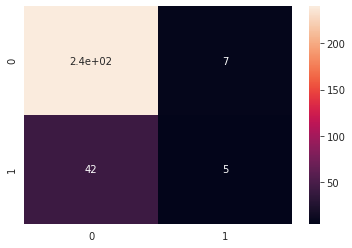

In [ ]:
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix, annot = True)